<a href="https://colab.research.google.com/github/vhppacheco/ic-ita-finance-ia/blob/main/sp500_analysis/SP500_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libs

In [ ]:
!pip install -q yfinance
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install sqldf
!pip install -q tsfeatures
!pip install umap-learn

     |████████████████████████████████| 6.4 MB 18.2 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 402, in run
    pycompile=options.compile,
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/req/__init__.py", line 85, in install_given_reqs
    pycompile=pycompile,
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/req/req_install.py", line 795, in install
    requested=self.user_supplied,
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/operations/install/wheel.py", line 818, in install_wheel
    requested=requested,
  File "/usr/local/lib/pyt

In [ ]:
import requests
import pandas as pd
from time import sleep
import yfinance as yf
from bs4 import BeautifulSoup
from selenium import webdriver
import json
import sys
import datetime

from google.colab import drive
drive.mount('/content/drive')



from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30,12
from pandas.plotting import register_matplotlib_converters

from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from math import sqrt

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

#Transforming the data

##Reading data

In [ ]:
sp500_indicators = pd.read_excel('/content/drive/MyDrive/IC ITA/df_SP500_Economatica.xlsx')

In [ ]:
sp500_indicators.columns

Index(['Data', 'Fechamento ajust p/ prov Em moeda orig',
       ' Ativo Tot  ajust por infl  em milhares  consolid:sim*',
       ' Patrim Liq  ajust por infl  em milhares  consolid:sim*',
       ' Receita  ajust por infl  em milhares  no exercício  consolid:sim*',
       ' Lucro Bruto  ajust por infl  em milhares  no exercício  consolid:sim*',
       ' EBIT  ajust por infl  em milhares  no exercício  consolid:sim*',
       ' Lucro Liquido  ajust por infl  em milhares  no exercício  consolid:sim*',
       ' LPA  ajust por infl  de 12 meses  consolid:sim*  ajust p/ prov',
       ' VPA  ajust por infl  consolid:sim*  ajust p/ prov',
       ' EBITDA/Acao  ajust por infl  de 12 meses  consolid:sim*  ajust p/ prov',
       ' Div Tt Bruta  Em moeda orig  em milhares  consolid:sim*',
       ' Div Tt Lq  ajust por infl  em milhares  consolid:sim*',
       ' EBIT/DivBr  de 12 meses  consolid:sim*',
       ' EBIT/Div Liq  de 12 meses  consolid:sim*',
       ' DivLq/Ebitda  de 12 meses  consolid:s

In [ ]:
sp500_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12225 entries, 0 to 12224
Data columns (total 42 columns):
 #   Column                                                                    Non-Null Count  Dtype 
---  ------                                                                    --------------  ----- 
 0   Data                                                                      12225 non-null  object
 1   Fechamento ajust p/ prov Em moeda orig                                    12225 non-null  object
 2    Ativo Tot  ajust por infl  em milhares  consolid:sim*                    12225 non-null  object
 3    Patrim Liq  ajust por infl  em milhares  consolid:sim*                   12225 non-null  object
 4    Receita  ajust por infl  em milhares  no exercício  consolid:sim*        12225 non-null  object
 5    Lucro Bruto  ajust por infl  em milhares  no exercício  consolid:sim*    12225 non-null  object
 6    EBIT  ajust por infl  em milhares  no exercício  consolid:sim*       

#Models Applications

## PCA

In [ ]:
min(sp500_application)

' AlaFin  de 12 meses  consolid:sim*'

In [ ]:
sp500_application = sp500_indicators.drop(['Data','Código','Setor NAICS ult disponiv'],axis='columns').replace('-',0).astype(float)
sp500_application = sp500_application.fillna(0)

columns = [#'Fechamento ajust p/ prov Em moeda orig',
       #' Ativo Tot  ajust por infl  em milhares  consolid:sim*',
       ' Patrim Liq  ajust por infl  em milhares  consolid:sim*',
       ' Receita  ajust por infl  em milhares  no exercício  consolid:sim*',
       ' Lucro Bruto  ajust por infl  em milhares  no exercício  consolid:sim*',
       ' EBIT  ajust por infl  em milhares  no exercício  consolid:sim*',
       ' Lucro Liquido  ajust por infl  em milhares  no exercício  consolid:sim*',
       ' LPA  ajust por infl  de 12 meses  consolid:sim*  ajust p/ prov',
       ' VPA  ajust por infl  consolid:sim*  ajust p/ prov',
       ' EBITDA/Acao  ajust por infl  de 12 meses  consolid:sim*  ajust p/ prov',
       ' Div Tt Bruta  Em moeda orig  em milhares  consolid:sim*',
       ' Div Tt Lq  ajust por infl  em milhares  consolid:sim*',
       ' EBIT/DivBr  de 12 meses  consolid:sim*',
       ' EBIT/Div Liq  de 12 meses  consolid:sim*',
       ' DivLq/Ebitda  de 12 meses  consolid:sim*',
       ' DivBr/Patr  consolid:sim*', ' Mrg EBIT  de 12 meses  consolid:sim*',
       ' LiqCor  consolid:sim*',
       ' CapGir  ajust por infl  em milhares  consolid:sim*',
       ' EBITDA  ajust por infl  em milhares  de 12 meses  consolid:sim*',
       ' MrgBru  de 12 meses  consolid:sim*',
       ' Margem Liquida  de 12 meses  consolid:sim*',
       ' Mrg Ebitda  de 12 meses  consolid:sim*',
       ' RentAt  de 12 meses  consolid:sim*',
       ' RenPat(fim)  de 12 meses  consolid:sim*',
       ' ROIC (IC fim) %  de 12 meses  consolid:sim*',
       ' AlaFin  de 12 meses  consolid:sim*',
       ' Capex  ajust por infl  em milhares  de 12 meses  consolid:sim*',
       ' FCL  ajust por infl  em milhares  de 12 meses  consolid:sim*',
       'P/L ajust por infl de 12 meses consolid:sim*',
       'P/VPA ajust por infl consolid:sim*',
       'EV/EBITDA emp ajust por infl de 12 meses consolid:sim*',
       'Valor Mercado da empresa ajust por infl em milhares',
       'EV ajust por infl em milhares consolid:sim*',
       'Div Yld (fim) 1 anos ajust por infl', 'Liquidez 1 tri ajust por infl',
       'Media nulos = 0 do volume$ em 1 trimestre ajust por infl em milhares',
       'Volatilidade base trimestral 1 anos ajust por infl',
       'Beta 60 tri ajust por infl']

for column in columns:
  sp500_application[column] = sp500_application[column].loc[sp500_application[column].isnull()==False]
  sp500_application = sp500_application[np.isfinite(sp500_application[column]) == True]
  sp500_application[column] = (sp500_application[column]-min(sp500_application[column].dropna())) /(max(sp500_application[column].dropna())-min(sp500_application[column].dropna()))
sp500_application = sp500_application.fillna(0)
sp500_data = sp500_application[
    [
        
     #'Fechamento ajust p/ prov Em moeda orig',
       #' Ativo Tot  ajust por infl  em milhares  consolid:sim*',
       ' Patrim Liq  ajust por infl  em milhares  consolid:sim*',
       ' Receita  ajust por infl  em milhares  no exercício  consolid:sim*',
       ' Lucro Bruto  ajust por infl  em milhares  no exercício  consolid:sim*',
       ' EBIT  ajust por infl  em milhares  no exercício  consolid:sim*',
       ' Lucro Liquido  ajust por infl  em milhares  no exercício  consolid:sim*',
       ' LPA  ajust por infl  de 12 meses  consolid:sim*  ajust p/ prov',
       ' VPA  ajust por infl  consolid:sim*  ajust p/ prov',
       ' EBITDA/Acao  ajust por infl  de 12 meses  consolid:sim*  ajust p/ prov',
       ' Div Tt Bruta  Em moeda orig  em milhares  consolid:sim*',
       ' Div Tt Lq  ajust por infl  em milhares  consolid:sim*',
       ' EBIT/DivBr  de 12 meses  consolid:sim*',
       ' EBIT/Div Liq  de 12 meses  consolid:sim*',
       ' DivLq/Ebitda  de 12 meses  consolid:sim*',
       ' DivBr/Patr  consolid:sim*', ' Mrg EBIT  de 12 meses  consolid:sim*',
       ' LiqCor  consolid:sim*',
       ' CapGir  ajust por infl  em milhares  consolid:sim*',
       ' EBITDA  ajust por infl  em milhares  de 12 meses  consolid:sim*',
       ' MrgBru  de 12 meses  consolid:sim*',
       ' Margem Liquida  de 12 meses  consolid:sim*',
       ' Mrg Ebitda  de 12 meses  consolid:sim*',
       ' RentAt  de 12 meses  consolid:sim*',
       ' RenPat(fim)  de 12 meses  consolid:sim*',
       ' ROIC (IC fim) %  de 12 meses  consolid:sim*',
       ' AlaFin  de 12 meses  consolid:sim*',
       ' Capex  ajust por infl  em milhares  de 12 meses  consolid:sim*',
       ' FCL  ajust por infl  em milhares  de 12 meses  consolid:sim*',
       'P/L ajust por infl de 12 meses consolid:sim*',
       'P/VPA ajust por infl consolid:sim*',
       'EV/EBITDA emp ajust por infl de 12 meses consolid:sim*',
       'Valor Mercado da empresa ajust por infl em milhares',
       'EV ajust por infl em milhares consolid:sim*',
       'Div Yld (fim) 1 anos ajust por infl', 'Liquidez 1 tri ajust por infl',
       'Media nulos = 0 do volume$ em 1 trimestre ajust por infl em milhares',
       'Volatilidade base trimestral 1 anos ajust por infl',
       'Beta 60 tri ajust por infl'
    ]
].values

In [ ]:
sp500_application

,Fechamento ajust p/ prov Em moeda orig,Ativo Tot ajust por infl em milhares consolid:sim*,Patrim Liq ajust por infl em milhares consolid:sim*,Receita ajust por infl em milhares no exercício consolid:sim*,Lucro Bruto ajust por infl em milhares no exercício consolid:sim*,EBIT ajust por infl em milhares no exercício consolid:sim*,Lucro Liquido ajust por infl em milhares no exercício consolid:sim*,LPA ajust por infl de 12 meses consolid:sim* ajust p/ prov,VPA ajust por infl consolid:sim* ajust p/ prov,EBITDA/Acao ajust por infl de 12 meses consolid:sim* ajust p/ prov,...,P/L ajust por infl de 12 meses consolid:sim*,P/VPA ajust por infl consolid:sim*,EV/EBITDA emp ajust por infl de 12 meses consolid:sim*,Valor Mercado da empresa ajust por infl em milhares,EV ajust por infl em milhares consolid:sim*,Div Yld (fim) 1 anos ajust por infl,Liquidez 1 tri ajust por infl,Media nulos = 0 do volume$ em 1 trimestre ajust por infl em milhares,Volatilidade base trimestral 1 anos ajust por infl,Beta 60 tri ajust por infl
0,0.023573,0.009944,0.063411,0.014732,0.051351,0.235795,0.367621,0.990400,0.008699,0.000003,...,0.700972,0.660337,0.018269,0.040615,0.061824,0.000000,0.0,0.000000,0.072667,0.297099
1,0.024940,0.009899,0.063450,0.029425,0.073043,0.250758,0.377441,0.990400,0.008699,0.000003,...,0.700972,0.660351,0.018272,0.042023,0.063231,0.000000,0.0,0.011979,0.060390,0.296373
2,0.025254,0.010126,0.063645,0.044313,0.094882,0.266134,0.387625,0.990400,0.008699,0.000003,...,0.700972,0.660348,0.018272,0.042016,0.063146,0.000000,0.0,0.011305,0.030236,0.294153
3,0.025753,0.009785,0.059902,0.058511,0.115377,0.279621,0.396503,0.990400,0.008699,0.000003,...,0.700972,0.660426,0.018271,0.042573,0.063406,0.000000,0.0,0.012607,0.031748,0.288183
4,0.027773,0.009804,0.061185,0.014923,0.051330,0.235341,0.367755,0.990400,0.008699,0.000003,...,0.700972,0.660425,0.018276,0.044855,0.065727,0.035741,0.0,0.013026,0.019349,0.288207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12220,0.026504,0.003739,0.045471,0.003483,0.036728,0.226618,0.361601,0.990400,0.008699,0.000002,...,0.700972,0.660812,0.018358,0.027036,0.046350,0.008280,0.0,0.010808,0.092421,0.089268
12221,0.031411,0.003718,0.045775,0.006754,0.043513,0.231540,0.365000,0.990400,0.008699,0.000002,...,0.700972,0.660912,0.018377,0.031165,0.050266,0.007547,0.0,0.009901,0.090463,0.089268
12222,0.032764,0.003587,0.046330,0.010085,0.050394,0.236567,0.368665,0.990400,0.008699,0.000002,...,0.700972,0.660879,0.018380,0.032101,0.051085,0.007620,0.0,0.010176,0.068138,0.089268
12223,0.041233,0.003579,0.045925,0.013225,0.056779,0.240471,0.371243,0.990400,0.008699,0.000002,...,0.700972,0.661160,0.018421,0.039631,0.058233,0.006407,0.0,0.010110,0.095735,0.089268


In [ ]:
from sklearn.decomposition import PCA
X = sp500_data
pca = PCA()
pca.fit(X)

PCA()

In [ ]:
print(pca.explained_variance_ratio_)

[3.35208063e-01 2.66207022e-01 9.92765406e-02 7.77026490e-02
 4.94075830e-02 3.13388093e-02 2.58672044e-02 2.37556815e-02
 1.95516602e-02 1.61357970e-02 1.11019416e-02 8.52382760e-03
 5.49926991e-03 4.77195319e-03 4.28809221e-03 4.24206349e-03
 3.25561146e-03 2.26588336e-03 1.71596131e-03 1.62903025e-03
 1.30626379e-03 1.26727415e-03 1.06979908e-03 9.46855082e-04
 8.92508613e-04 8.47295084e-04 7.61399550e-04 5.14230139e-04
 2.39433162e-04 1.97481267e-04 1.63255399e-04 4.12264644e-05
 7.99683394e-06 3.09922750e-07 2.70921982e-08 1.68376109e-33
 1.68376109e-33]


In [ ]:
pca_var_ratio = pd.DataFrame(pca.explained_variance_ratio_)
pca_var_ratio['column'] = columns

In [ ]:
pca_var_ratio

,0,column
0,3.352081e-01,Patrim Liq ajust por infl em milhares cons...
1,2.662070e-01,Receita ajust por infl em milhares no exer...
2,9.927654e-02,Lucro Bruto ajust por infl em milhares no ...
3,7.770265e-02,EBIT ajust por infl em milhares no exercíc...
4,4.940758e-02,Lucro Liquido ajust por infl em milhares n...
5,3.133881e-02,LPA ajust por infl de 12 meses consolid:si...
6,2.586720e-02,VPA ajust por infl consolid:sim* ajust p/ ...
7,2.375568e-02,EBITDA/Acao ajust por infl de 12 meses con...
8,1.955166e-02,Div Tt Bruta Em moeda orig em milhares con...
9,1.613580e-02,Div Tt Lq ajust por infl em milhares conso...


In [ ]:
sum(pca.explained_variance_ratio_)

1.0000000000000004

In [ ]:
print(pca.singular_values_)

[1.74611940e+01 1.55606045e+01 9.50254702e+00 8.40687562e+00
 6.70368369e+00 5.33897584e+00 4.85055526e+00 4.64836751e+00
 4.21704786e+00 3.83099795e+00 3.17772404e+00 2.78441547e+00
 2.23650168e+00 2.08336228e+00 1.97491663e+00 1.96428858e+00
 1.72081029e+00 1.43560673e+00 1.24931069e+00 1.21725421e+00
 1.09001419e+00 1.07362347e+00 9.86433517e-01 9.28022417e-01
 9.00996114e-01 8.77877773e-01 8.32191006e-01 6.83904519e-01
 4.66668901e-01 4.23818258e-01 3.85345673e-01 1.93644317e-01
 8.52856078e-02 1.67897194e-02 4.96408069e-03 1.23753344e-15
 1.23753344e-15]


##UMAP testing

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,10

In [ ]:
import umap

In [ ]:
sp500_application = sp500_indicators.drop(['Data','Código','Setor NAICS ult disponiv'],axis='columns').replace('-',0).astype(float)
sp500_application = sp500_application.fillna(0)

In [ ]:
columns = columns = [#'Fechamento ajust p/ prov Em moeda orig',
       #' Ativo Tot  ajust por infl  em milhares  consolid:sim*',
       ' Patrim Liq  ajust por infl  em milhares  consolid:sim*',
       ' Receita  ajust por infl  em milhares  no exercício  consolid:sim*',
       ' Lucro Bruto  ajust por infl  em milhares  no exercício  consolid:sim*',
       ' EBIT  ajust por infl  em milhares  no exercício  consolid:sim*',
       ' Lucro Liquido  ajust por infl  em milhares  no exercício  consolid:sim*',
       ' LPA  ajust por infl  de 12 meses  consolid:sim*  ajust p/ prov',
       ' VPA  ajust por infl  consolid:sim*  ajust p/ prov',
       ' EBITDA/Acao  ajust por infl  de 12 meses  consolid:sim*  ajust p/ prov',
       ' Div Tt Bruta  Em moeda orig  em milhares  consolid:sim*',
       ' Div Tt Lq  ajust por infl  em milhares  consolid:sim*',
       ' EBIT/DivBr  de 12 meses  consolid:sim*',
       ' EBIT/Div Liq  de 12 meses  consolid:sim*',
       ' DivLq/Ebitda  de 12 meses  consolid:sim*',
       ' DivBr/Patr  consolid:sim*', ' Mrg EBIT  de 12 meses  consolid:sim*',
       ' LiqCor  consolid:sim*',
       ' CapGir  ajust por infl  em milhares  consolid:sim*',
       ' EBITDA  ajust por infl  em milhares  de 12 meses  consolid:sim*',
       ' MrgBru  de 12 meses  consolid:sim*',
       ' Margem Liquida  de 12 meses  consolid:sim*',
       ' Mrg Ebitda  de 12 meses  consolid:sim*',
       ' RentAt  de 12 meses  consolid:sim*',
       ' RenPat(fim)  de 12 meses  consolid:sim*',
       ' ROIC (IC fim) %  de 12 meses  consolid:sim*',
       ' AlaFin  de 12 meses  consolid:sim*',
       ' Capex  ajust por infl  em milhares  de 12 meses  consolid:sim*',
       ' FCL  ajust por infl  em milhares  de 12 meses  consolid:sim*',
       'P/L ajust por infl de 12 meses consolid:sim*',
       'P/VPA ajust por infl consolid:sim*',
       'EV/EBITDA emp ajust por infl de 12 meses consolid:sim*',
       'Valor Mercado da empresa ajust por infl em milhares',
       'EV ajust por infl em milhares consolid:sim*',
       'Div Yld (fim) 1 anos ajust por infl', 'Liquidez 1 tri ajust por infl',
       'Media nulos = 0 do volume$ em 1 trimestre ajust por infl em milhares',
       'Volatilidade base trimestral 1 anos ajust por infl',
       'Beta 60 tri ajust por infl']

for column in columns:
  sp500_application[column] = sp500_application[column].loc[sp500_application[column].isnull()==False]
  sp500_application = sp500_application[np.isfinite(sp500_application[column]) == True]
  sp500_application[column] = (sp500_application[column]-min(sp500_application[column].dropna())) /(max(sp500_application[column].dropna())-min(sp500_application[column].dropna()))

In [ ]:
sp500_application = sp500_application.fillna(0)

In [ ]:
sp500_data = sp500_application[columns].values
scaled_sp500_data = StandardScaler().fit_transform(sp500_data)

In [ ]:
sp500_data.shape

(12225, 37)

In [ ]:
reducer = umap.UMAP()

In [ ]:
embedding = reducer.fit_transform(sp500_data)
embedding.shape 

(12225, 2)

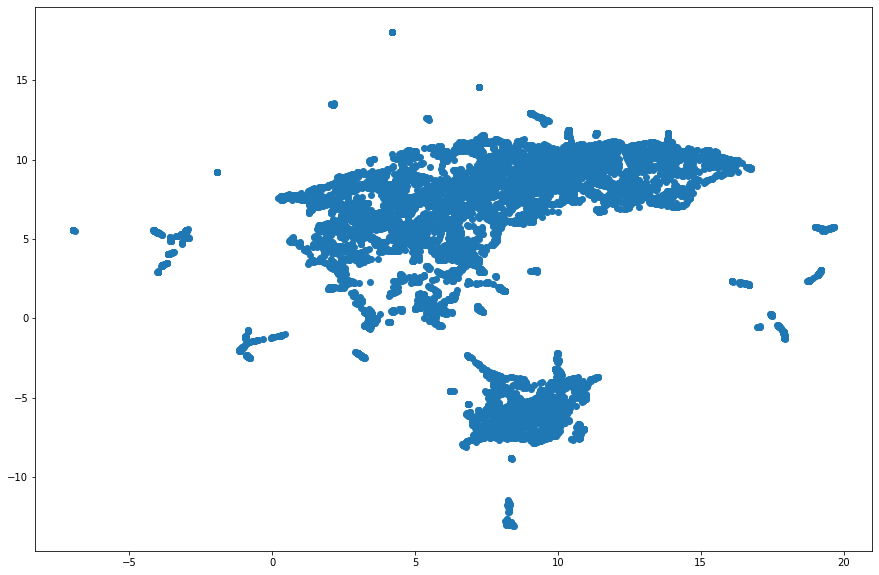

In [ ]:
plt.scatter(embedding[:,0], embedding[:,1])

Text(0.5, 1.0, 'UMAP projection of the S&P500 Index')

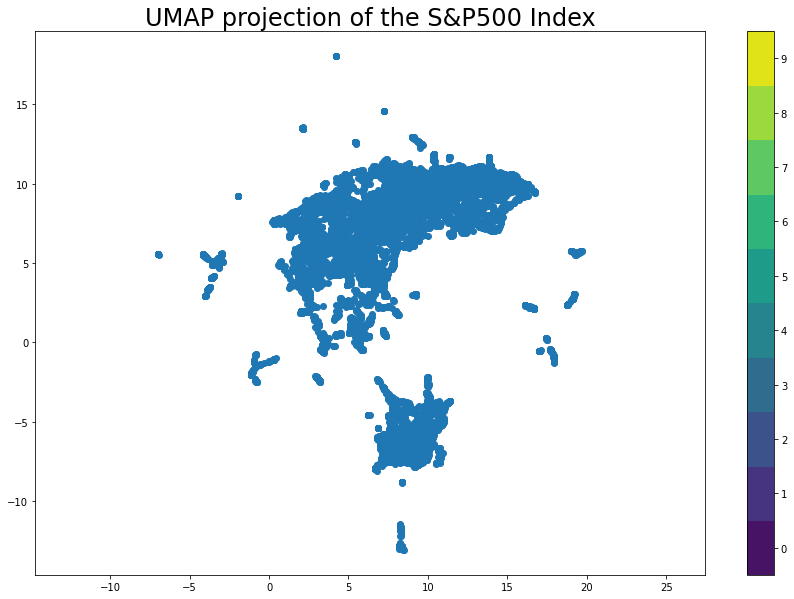

In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    #c=sp500_data
    )
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the S&P500 and ibov Index', fontsize=24)

In [ ]:
data = sp500_data 

In [ ]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], 
                   range(len(u)), 
                   #c=data
                   )
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], 
                   u[:,1], 
                   #c=data
                   )
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], 
                   u[:,1], 
                   u[:,2], 
                   #c=data
                   )
    plt.title(title, fontsize=18)

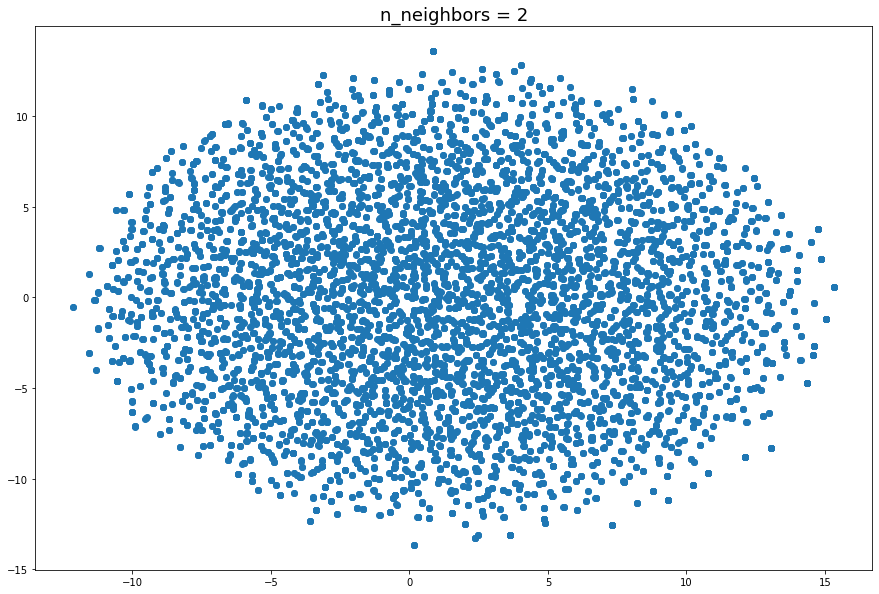

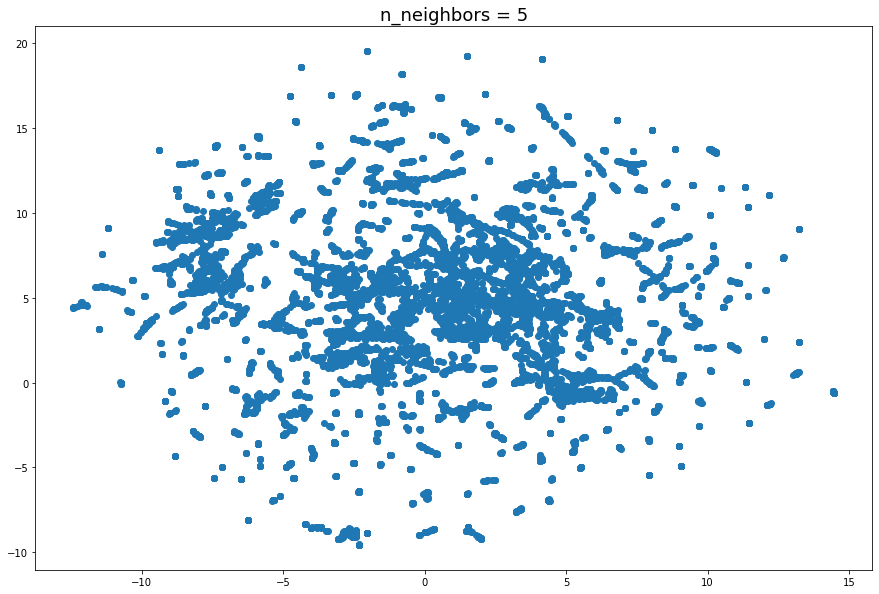

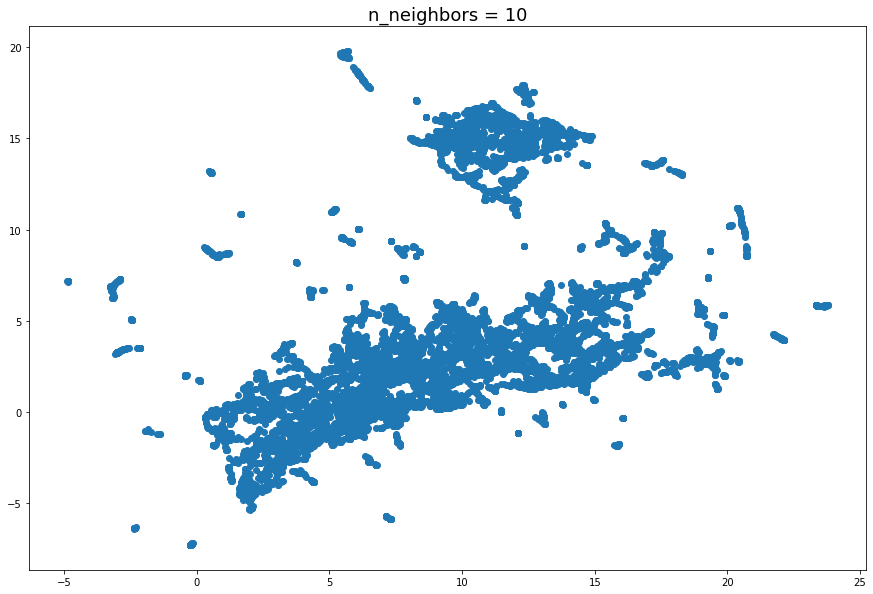

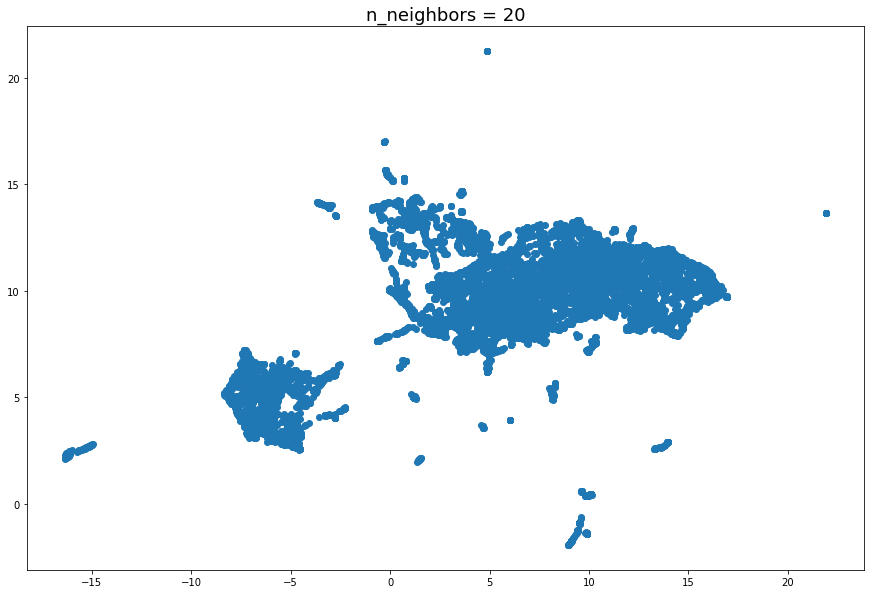

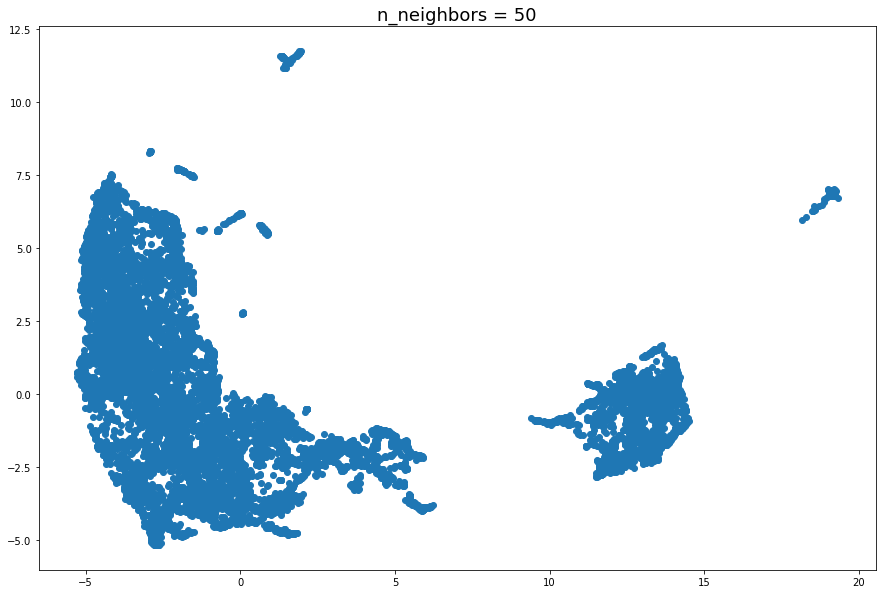

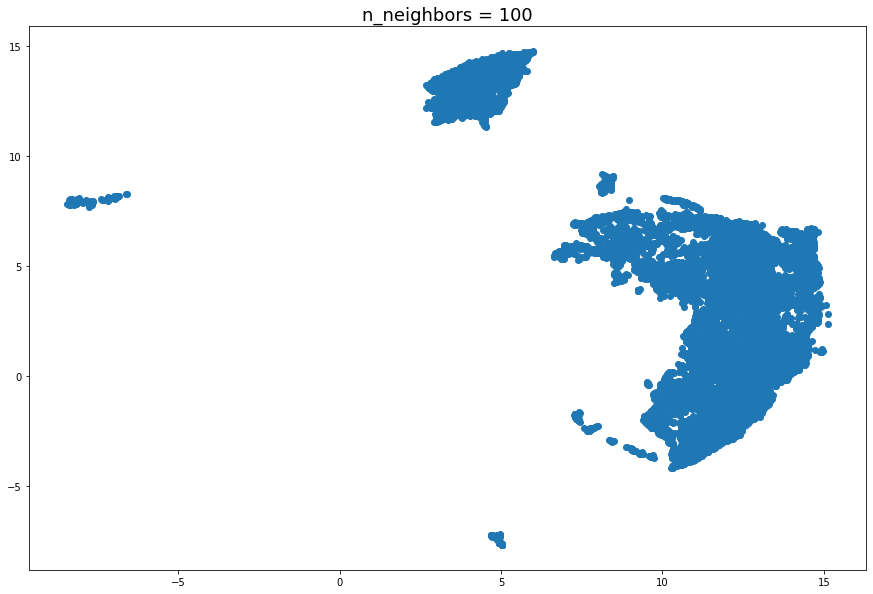

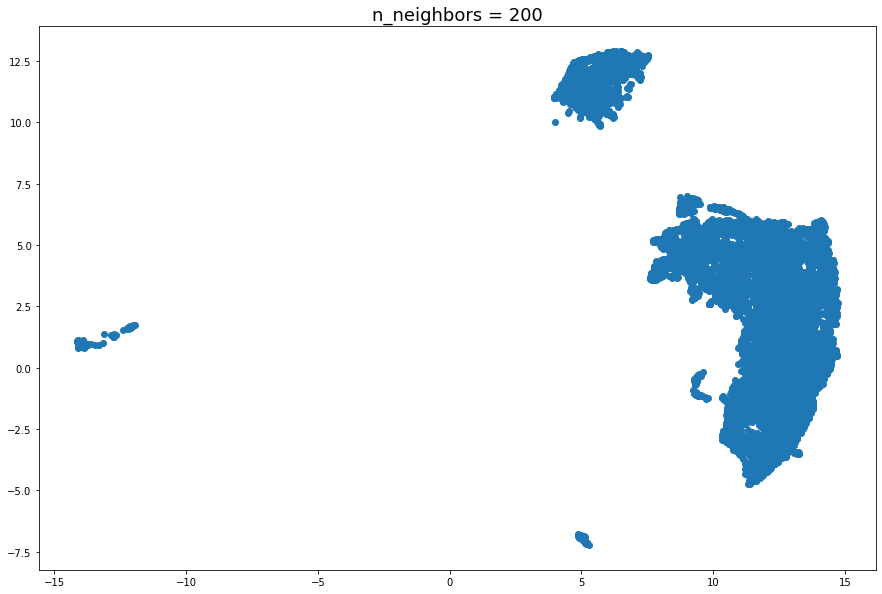

In [ ]:
for n in (2, 5, 10, 20, 50, 100, 200):
    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

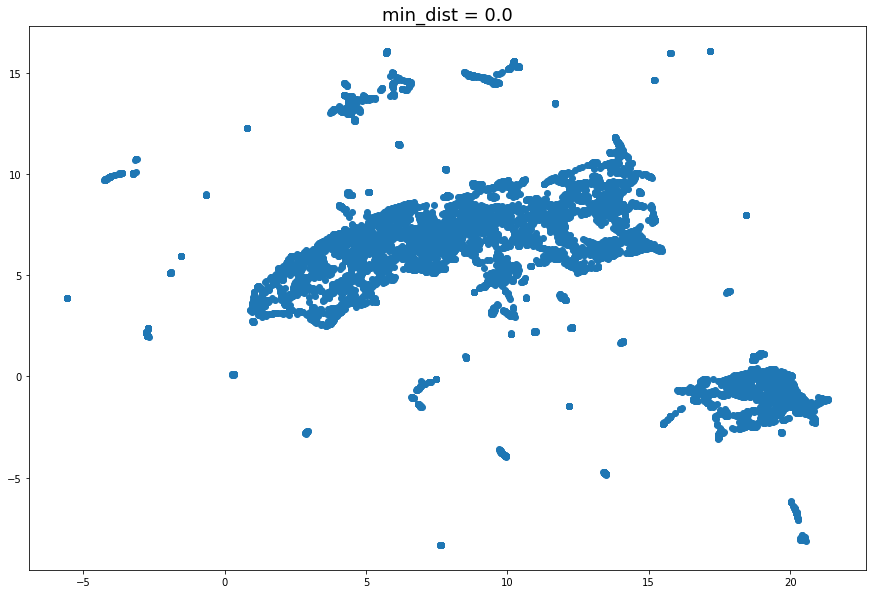

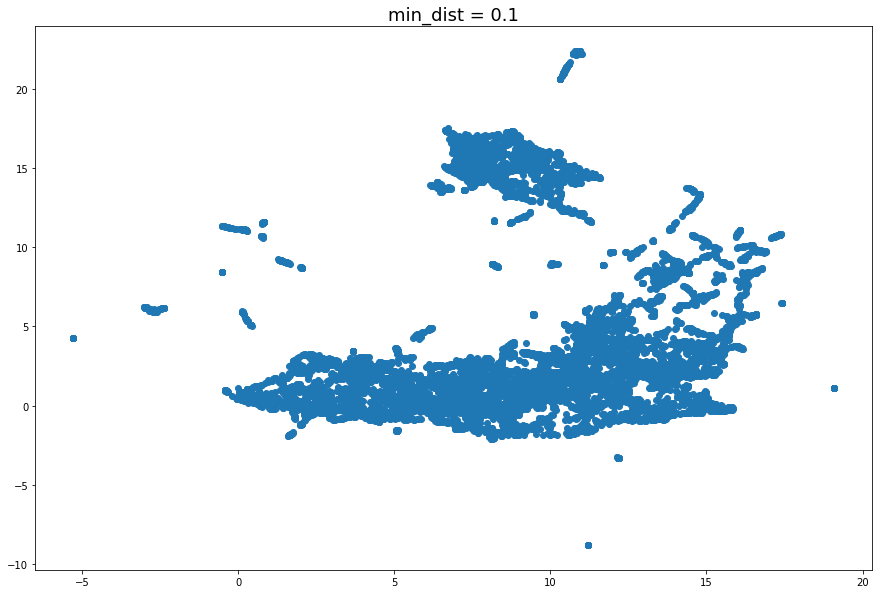

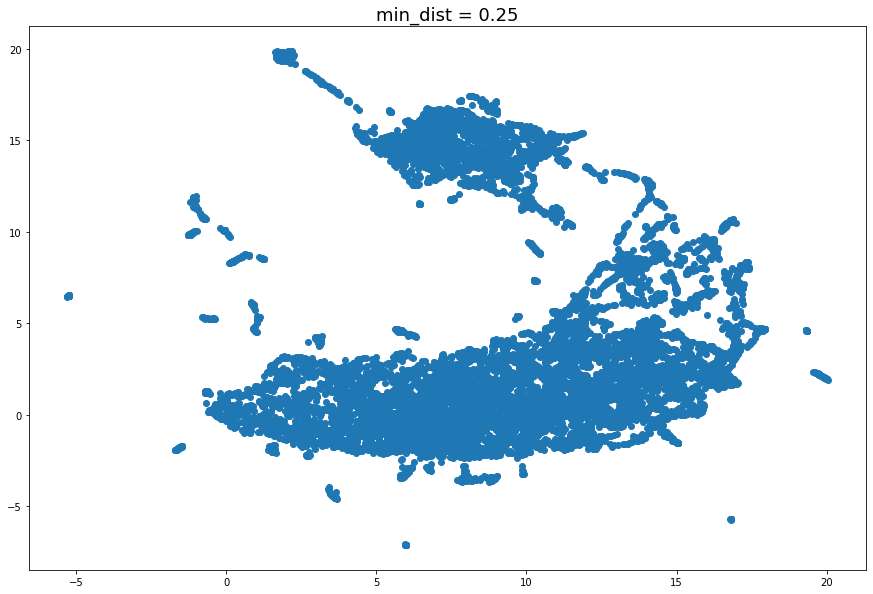

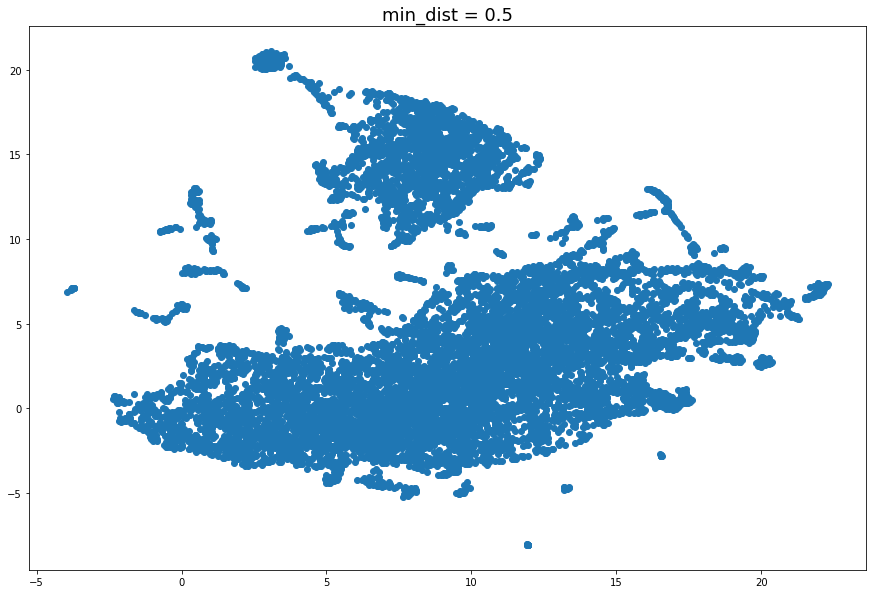

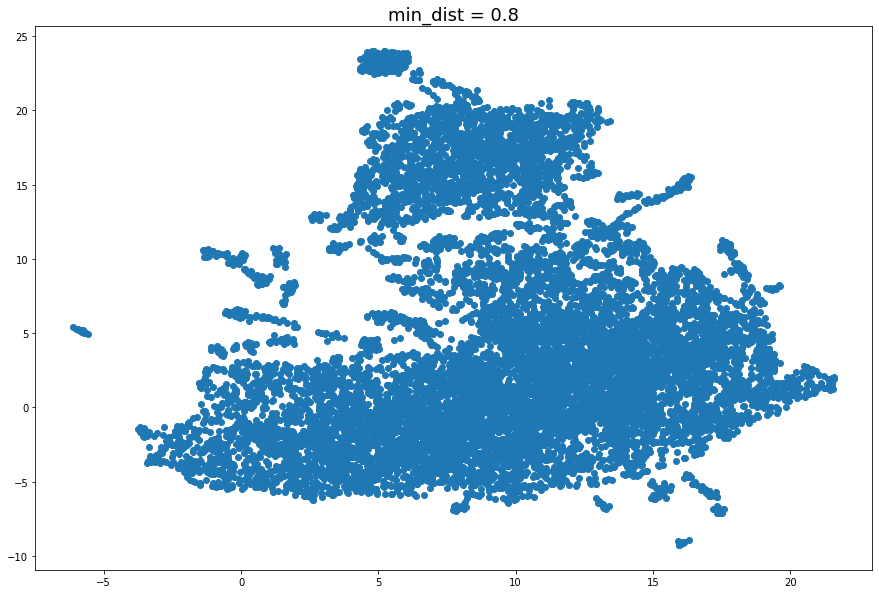

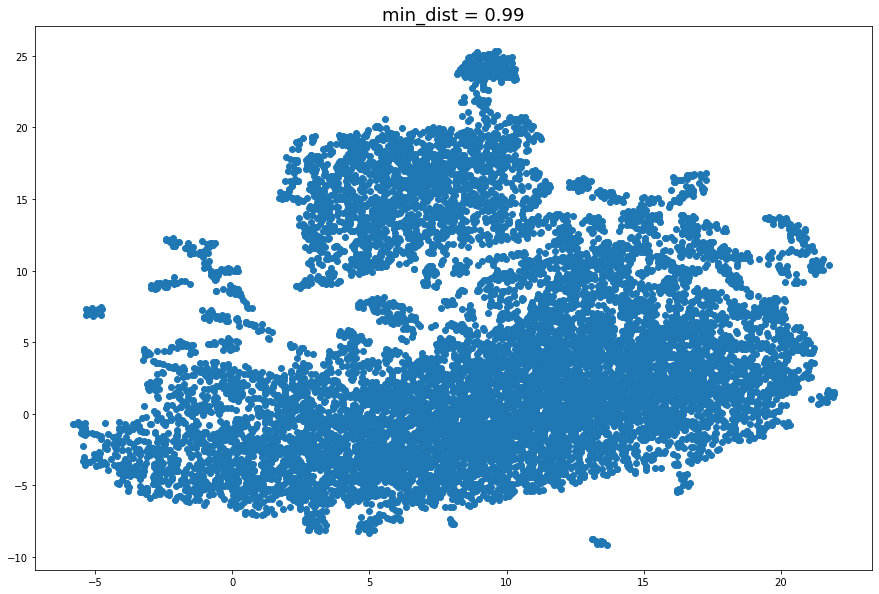

In [ ]:
for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
    draw_umap(min_dist=d, title='min_dist = {}'.format(d))

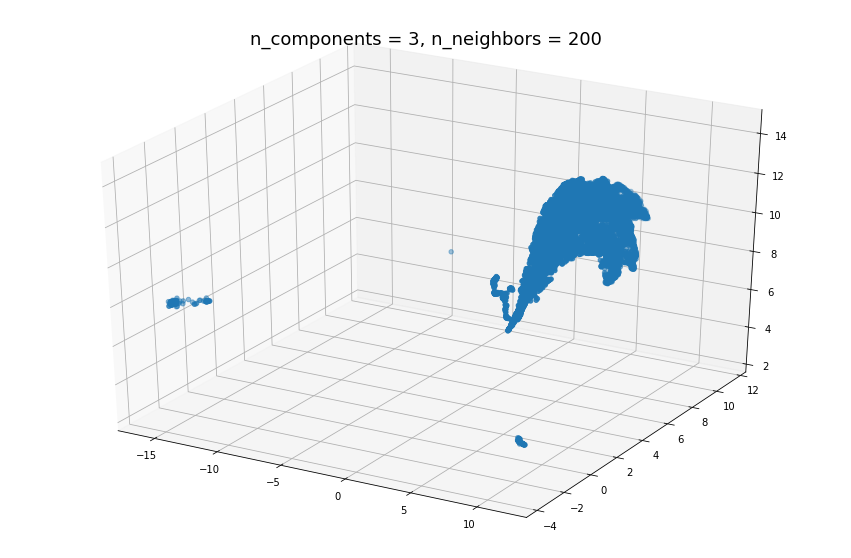

In [ ]:
draw_umap(n_components=3,n_neighbors=200, title='n_components = 3, n_neighbors = 200')

##K-Means application for UMAP output

In [ ]:
kmeans_input = pd.DataFrame(embedding)
kmeans_input.rename(columns={0:'x',1:'y'},inplace=True)

In [ ]:
columns = ['x','y']

for column in columns:
  kmeans_input[column] = (kmeans_input[column]-min(kmeans_input[column].dropna()))/(max(kmeans_input[column].dropna())-min(kmeans_input[column].dropna()))

In [ ]:
X = kmeans_input.iloc[:,[0,1]].values

In [ ]:
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,10
from pandas.plotting import register_matplotlib_converters

from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
WCSS = []

In [ ]:
for i in range (1,11):
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(X)
  WCSS.append(kmeans.inertia_)

In [ ]:
plt.plot(range(1,11),WCSS)
plt.xlabel('Numero de clusters')
plt.ylabel('wcss')

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
previsoes = kmeans.fit_predict(X)

In [ ]:
plt.scatter(X[previsoes == 0,0], X[previsoes == 0,1],s=100, c='red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1,0], X[previsoes == 1,1],s=100, c='green', label = 'Cluster 2')
plt.scatter(X[previsoes == 2,0], X[previsoes == 2,1],s=100, c='blue', label = 'Cluster 3')
plt.scatter(X[previsoes == 3,0], X[previsoes == 3,1],s=100, c='yellow', label = 'Cluster 4')

In [ ]:
kmeans_output = pd.DataFrame(np.column_stack((kmeans_input, previsoes)))

In [ ]:
kmeans_output

In [ ]:
kmeans_output = kmeans_output.rename(columns={0:'x',1:'y',2:'Cluster'})

In [ ]:
#preenchendo a coluna de clusters no dataframe do S&P500
us_ratios_sp500_application['Cluster UMAP'] = ''
for i in range(0,len(us_ratios_sp500_application)):
  cluster = int(kmeans_output['Cluster'].iloc[i])
  us_ratios_sp500_application['Cluster UMAP'].iloc[i] = int(cluster)

In [ ]:
kmeans_output.groupby('Cluster',dropna=False).count()

#UMAP n-neighbors x WCSS K-means

In [ ]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [ ]:
def umap_kmeans(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);

    #k-means
    kmeans_input = pd.DataFrame(u)
    kmeans_input.rename(columns={0:'x',1:'y'},inplace=True)

    columns = ['x','y']
    for column in columns:
      kmeans_input[column] = (kmeans_input[column]-min(kmeans_input[column].dropna()))/(max(kmeans_input[column].dropna())-min(kmeans_input[column].dropna()))

    X = kmeans_input.iloc[:,[0,1]].values

    WCSS = []
    for i in range (1,11):
      kmeans = KMeans(n_clusters=i,random_state=0)
      kmeans.fit(X)
      WCSS.append(kmeans.inertia_)

    rel_umap_kmeans[0].append(n_neighbors)
    rel_umap_kmeans[1].append(optimal_number_of_clusters(WCSS))

    plt.plot(range(1,11),WCSS)
    plt.xlabel('Numero de clusters')
    plt.ylabel('wcss')

KeyboardInterrupt: ignored

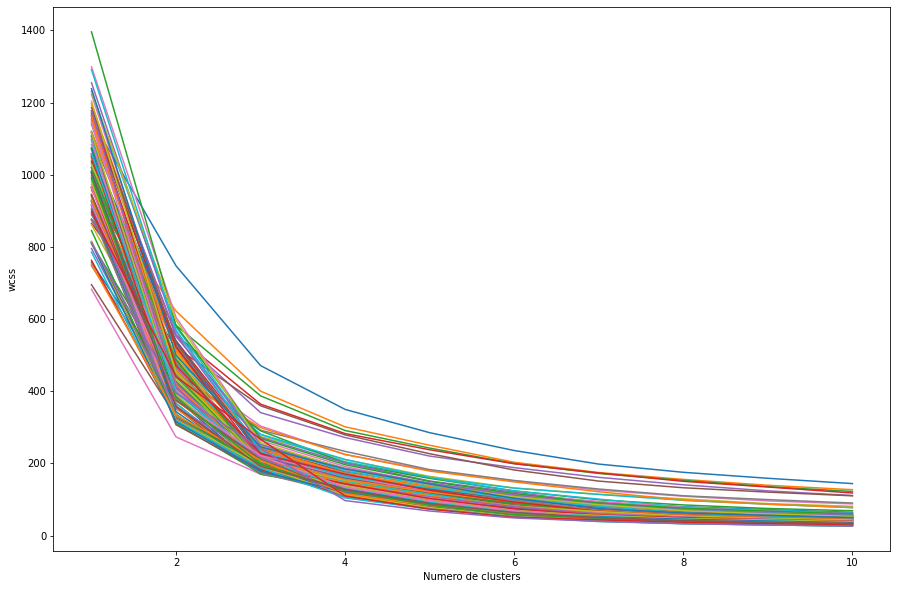

In [ ]:
rel_umap_kmeans = [[],[]]

for n in range(2,200+1):
    umap_kmeans(n_neighbors=n, title='n_neighbors = {}'.format(n))

In [ ]:
test = pd.DataFrame(rel_umap_kmeans).T
test.rename(columns={0:'n_neighbors',1:'n_clusters'},inplace=True)

In [ ]:
plt.plot(test)

In [ ]:
test

In [ ]:
plt.plot(test['n_neighbors'],test['n_clusters'])
plt.xlabel('n_neighbors')
plt.ylabel('n_clusters')

In [ ]:
rel_umap_kmeans = [[],[]]
for n in range(2,200+1,10):
    umap_kmeans(n_neighbors=n, title='n_neighbors = {}'.format(n))

In [ ]:
rel_umap_kmeans = [[],[]]
for n in range(2,200+1,25):
    umap_kmeans(n_neighbors=n, title='n_neighbors = {}'.format(n))

##K-Means application for the same features used in UMAP

In [ ]:
sp500_data.shape

In [ ]:
X = sp500_data#.iloc[:,[0,13]].values

In [ ]:
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30,12
from pandas.plotting import register_matplotlib_converters

from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
X

In [ ]:
WCSS = []

In [ ]:
for i in range (1,11):
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(X)
  WCSS.append(kmeans.inertia_)

In [ ]:
plt.plot(range(1,11),WCSS)
plt.xlabel('Numero de clusters')
plt.ylabel('wcss')

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
previsoes = kmeans.fit_predict(X)

In [ ]:
kmeans_output = pd.DataFrame(np.column_stack((kmeans_input, previsoes)))

In [ ]:
kmeans_output = kmeans_output.rename(columns={0:'x',1:'y',2:'Cluster'})

In [ ]:
us_ratios_sp500_application['Cluster k-means'] = ''
for i in range(0,len(us_ratios_sp500_application)):
  cluster = int(kmeans_output['Cluster'].iloc[i])
  us_ratios_sp500_application['Cluster k-means'].iloc[i] = int(cluster)

In [ ]:
kmeans_output.groupby('Cluster',dropna=False).count()

In [ ]:
us_ratios_sp500_application[['Cluster k-means','Ticker']].groupby('Cluster k-means',dropna=False).count()

In [ ]:
us_ratios_sp500_application[['Cluster UMAP','Ticker']].groupby('Cluster UMAP',dropna=False).count()

In [ ]:
us_ratios_sp500_application